In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from scipy.interpolate import interp1d
from scipy import linalg
from astropy.io import fits
from astropy.table import Table
from sklearn import covariance

In [3]:
import sys
sys.path.append("..")
import panco2 as p2
import panco2.noise_covariance as nc

# Noise realization from Planck C_ell

In [ ]:
powspec = Table.read("../validation/example_data/Planck/noise_powspec.csv")
fig, ax = plt.subplots()
ax.loglog(powspec["ell"], powspec["c_ell"], "k-", lw=2)

In [ ]:
cov, inv_cov, maps = nc.covmat_from_powspec(
    powspec["ell"], powspec["c_ell"], 61, 2.0 * 60, n_maps=10, return_maps=True
)

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

ymax = np.max(np.abs(maps))

for i, ax in enumerate(axs.flatten()):
    im = ax.imshow(maps[i], vmin=-ymax, vmax=ymax, cmap="seismic")
fig.colorbar(im, ax=axs)

In [ ]:
fig, ax = plt.subplots()
ax.loglog(powspec["ell"], powspec["c_ell"], "k-", lw=2)
for m in maps:
    pk, k = nc.powspec(m, 120.0, n_bins=30)
    ell = 180 * 3600 * k
    ax.plot(ell, pk, ".-", alpha=0.2)

In [ ]:
powspec['c_ell']

# Noise realization from SPT C_ell

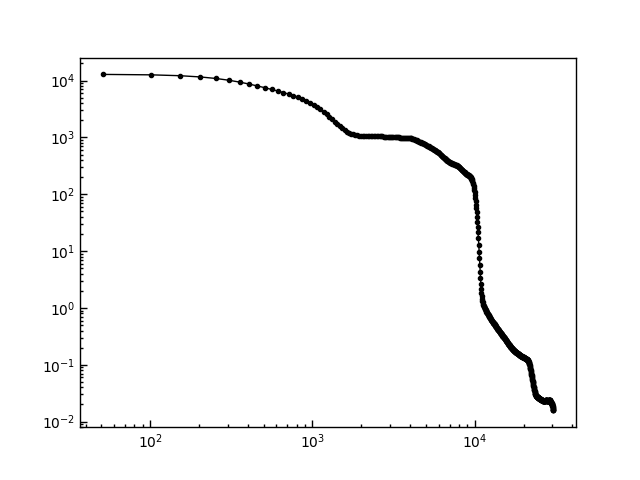

In [7]:
powspec = Table.read("../validation/example_data/SPT/noise_powspec.csv", format="csv")
fig, ax = plt.subplots()
ax.loglog(powspec["ell"], powspec["c_ell"], "k.-")

In [12]:
cov, iconv, maps = nc.covmat_from_powspec(
    powspec["ell"], powspec["c_ell"], 51, 15.0, 
    n_maps=1000, return_maps=True
)
#maps /= 1e5

/Users/fkeruzore/panco2/tests/../panco2/noise_covariance.py:96: RuntimeWarning: divide by zero encountered in log10
  filt = 10 ** filt_fct(np.log10(k_filt))


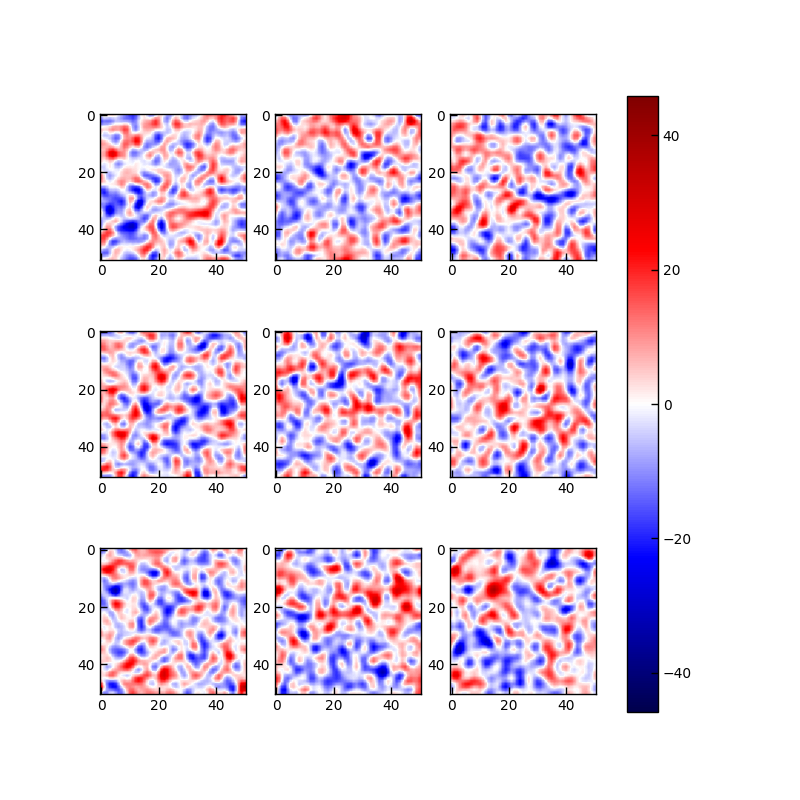

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

ymax = np.max(np.abs(maps))

for i, ax in enumerate(axs.flatten()):
    im = ax.imshow(maps[i], vmin=-ymax, vmax=ymax, cmap="seismic")
fig.colorbar(im, ax=axs)

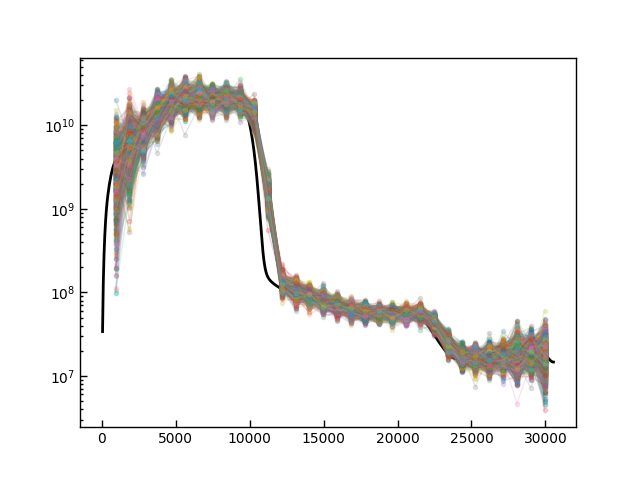

In [14]:
fig, ax = plt.subplots()
ax.semilogy(
    powspec["ell"], powspec["ell"] * (powspec["ell"] + 1) * powspec["c_ell"],
    "k-", lw=2
)
for m in maps:
    pk, k = nc.powspec(m, 15.0, n_bins=32)
    ell = 180 * 3600 * k
    ax.plot(ell, ell * (ell + 1) * pk, ".-", alpha=0.2)

In [ ]:
10 ** (-np.inf)